In [1]:
import os

In [2]:
os.chdir('smartcab')

In [3]:
os.getcwd()

'C:\\Users\\chuan\\notebooks\\smartcab\\smartcab'

In [4]:
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
import numpy as np
import time

In [5]:
from agent import LearningAgent

In [6]:
start=time.time()

In [7]:
parameter = [x/10.0 for x in range(11)]

In [8]:
epsilon_list = [0.001,0.01,0.05,0.1,0.2,0.5]

In [9]:
results=[]

In [10]:
for alpha in parameter:
    for gamma in parameter:
        for epsilon in epsilon_list:
            e = Environment()  # create environment (also adds some dummy traffic)
            a = e.create_agent(LearningAgent)  # create agent
            a.alpha = alpha
            a.gamma = gamma
            a.epsilon = epsilon
            e.set_primary_agent(a, enforce_deadline=True)  # specify agent to track
            e.reset()
            reached=[]
            update_delay=0.0001
            n_trials=100
            quit = False
            for trial in xrange(n_trials):
                #print "Simulator.run(): Trial {}".format(trial)  # [debug]
                e.reset()
                current_time = 0.0
                last_updated = 0.0
                start_time = time.time()
                while True:
                    try:
                        # Update current time
                        current_time = time.time() - start_time
                        #print "Simulator.run(): current_time = {:.3f}".format(self.current_time)

                        # Update environment
                        if current_time - last_updated >= update_delay:
                            e.step()
                            last_updated = current_time

                    except KeyboardInterrupt:
                        quit = True
                    finally:
                        if quit or e.done:
                            break
                if e.reached == True:
                    reached.append(e.reached)
            results.append([a.alpha,a.gamma,a.epsilon,float(len(reached))/n_trials])


In [11]:
end=time.time()
print end-start

1089.30100012


In [12]:
import pandas as pd

In [13]:
df=  pd.DataFrame(results)

In [14]:
df

0    1      2     3
0    0.0  0.0  0.001  0.30
1    0.0  0.0  0.010  0.24
2    0.0  0.0  0.050  0.20
3    0.0  0.0  0.100  0.19
4    0.0  0.0  0.200  0.24
5    0.0  0.0  0.500  0.12
6    0.0  0.1  0.001  0.16
7    0.0  0.1  0.010  0.23
8    0.0  0.1  0.050  0.19
9    0.0  0.1  0.100  0.20
10   0.0  0.1  0.200  0.20
11   0.0  0.1  0.500  0.18
12   0.0  0.2  0.001  0.15
13   0.0  0.2  0.010  0.18
14   0.0  0.2  0.050  0.17
15   0.0  0.2  0.100  0.21
16   0.0  0.2  0.200  0.23
17   0.0  0.2  0.500  0.18
18   0.0  0.3  0.001  0.17
19   0.0  0.3  0.010  0.22
20   0.0  0.3  0.050  0.23
21   0.0  0.3  0.100  0.29
22   0.0  0.3  0.200  0.18
23   0.0  0.3  0.500  0.15
24   0.0  0.4  0.001  0.18
25   0.0  0.4  0.010  0.21
26   0.0  0.4  0.050  0.18
27   0.0  0.4  0.100  0.22
28   0.0  0.4  0.200  0.18
29   0.0  0.4  0.500  0.20
..   ...  ...    ...   ...
696  1.0  0.6  0.001  0.98
697  1.0  0.6  0.010  0.96
698  1.0  0.6  0.050  1.00
699  1.0  0.6  0.100  0.97
700  1.0  0.6  0.200  1.00
701  1.0  0.6  0.500  0.99
702  1.0  0.7  0.001  0.97
703  1.0  0.7  0.010  0.97
704  1.0  0.7  0.050  1.00
705  1.0  0.7  0.100  0.99
706  1.0  0.7  0.200  1.00
707  1.0  0.7  0.500  0.97
708  1.0  0.8  0.001  0.99
709  1.0  0.8  0.010  0.99
710  1.0  0.8  0.050  0.99
711  1.0  0.8  0.100  1.00
712  1.0  0.8  0.200  0.97
713  1.0  0.8  0.500  1.00
714  1.0  0.9  0.001  0.97
715  1.0  0.9  0.010  1.00
716  1.0  0.9  0.050  0.98
717  1.0  0.9  0.100  0.98
718  1.0  0.9  0.200  1.00
719  1.0  0.9  0.500  0.91
720  1.0  1.0  0.001  0.99
721  1.0  1.0  0.010  0.97
722  1.0  1.0  0.050  0.97
723  1.0  1.0  0.100  0.99
724  1.0  1.0  0.200  0.96
725  1.0  1.0  0.500  1.00

[726 rows x 4 columns]

In [15]:
df.iloc[:,3].max()

1.0

In [16]:
list(df.iloc[:,3]).index(df.iloc[:,3].max())

68

In [17]:
ls=['alpha','gamma','epsilon','success_rate']

In [18]:
df.columns=ls

In [19]:
df.to_excel('tune_parameter_results.xlsx')

In [20]:
%matplotlib inline

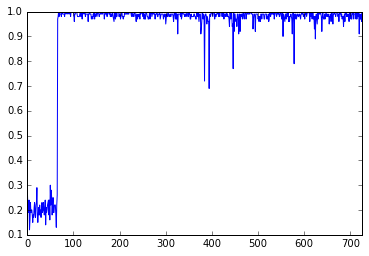

In [21]:
df.iloc[:,3].plot()

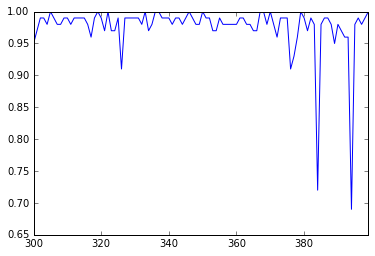

In [22]:
df.iloc[300:400,3].plot()

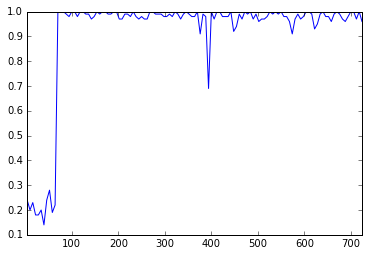

In [23]:
con = df.iloc[:,2] == 0.2
df[con].iloc[:,3].plot()

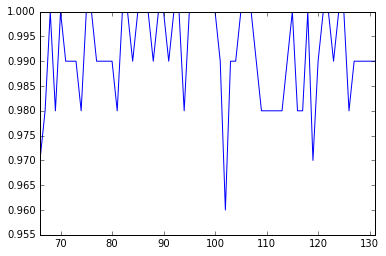

In [24]:
con = df.iloc[:,0] == 0.1
df[con].iloc[:,3].plot()

In [25]:
#alpha 影响最大

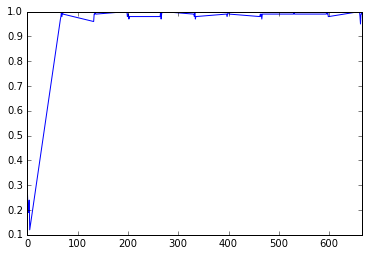

In [26]:
con = df.iloc[:,1] == 0
df[con].iloc[:,3].plot()

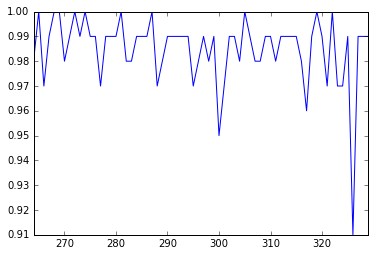

In [27]:
con = df.iloc[:,0] == 0.4
df[con].iloc[:,3].plot()

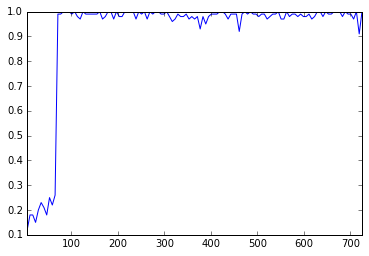

In [28]:
con = df.iloc[:,2] == 0.5
df[con].iloc[:,3].plot()

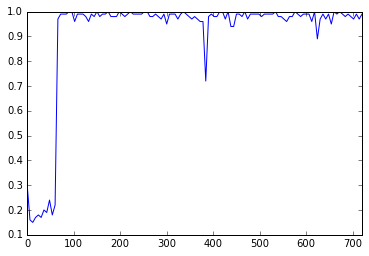

In [29]:
con = df.iloc[:,2] == 0.001
df[con].iloc[:,3].plot()

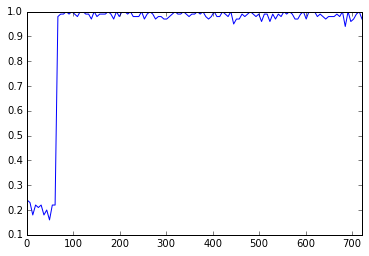

In [30]:
con = df.iloc[:,2] == 0.01
df[con].iloc[:,3].plot()

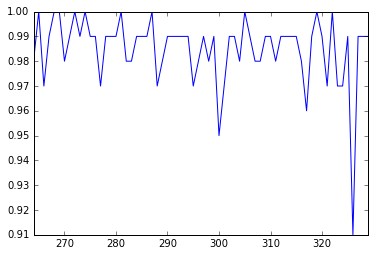

In [31]:
con = df.iloc[:,0] == 0.4
df[con].iloc[:,3].plot()

In [32]:
#作图查看各个参数的影响

In [33]:
import matplotlib.pyplot as plt

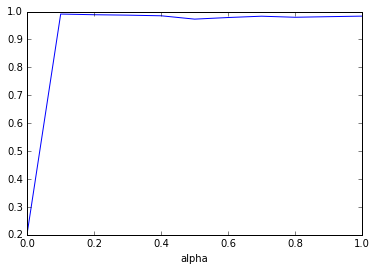

In [34]:
df.groupby('alpha').mean().iloc[:,2].plot()

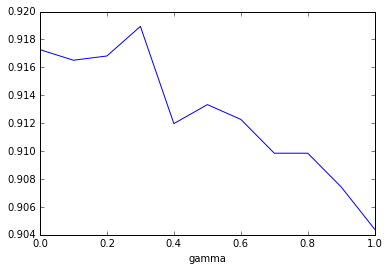

In [35]:
df.groupby('gamma').mean().iloc[:,2].plot()

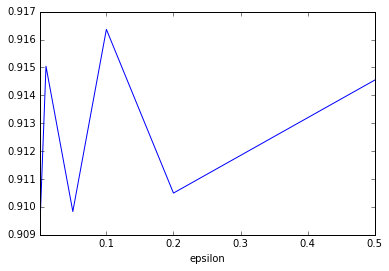

In [36]:
df.groupby('epsilon').mean().iloc[:,2].plot()

In [37]:
#把图画在一起

In [38]:
data = pd.Series(np.random.randn(1000))

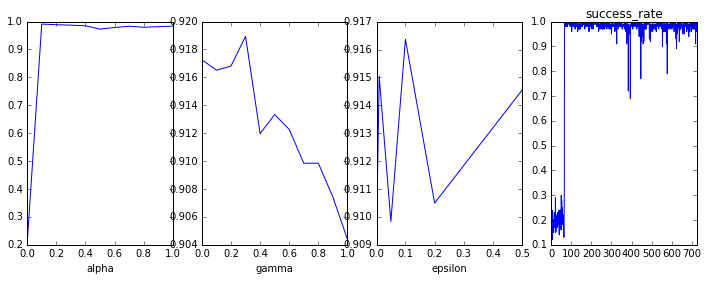

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=[12,4])

df.groupby('alpha').mean().iloc[:,2].plot(ax=axes[0])
df.groupby('gamma').mean().iloc[:,2].plot(ax=axes[1])
df.groupby('epsilon').mean().iloc[:,2].plot(ax=axes[2])
df.iloc[:,3].plot(ax=axes[3])
axes[3].set_title('success_rate')


In [40]:
df.groupby('alpha').mean().iloc[:,2].argmax()

0.10000000000000001

In [41]:
df.groupby('gamma').mean().iloc[:,2].argmax()

0.29999999999999999

In [42]:
df.groupby('epsilon').mean().iloc[:,2].argmax()

0.10000000000000001

In [43]:
df.groupby('epsilon').mean().iloc[:,2]

epsilon
0.001    0.909339
0.010    0.915041
0.050    0.909835
0.100    0.916364
0.200    0.910496
0.500    0.914545
Name: success_rate, dtype: float64

In [44]:
fig.savefig('test.jpg')

In [45]:
#alpha在[0.1,0.2,...,1.0]中选取时，平均成功率（变动其它参数时）都接近100%，其中alpha=0.3时，平均成功率最高。说明在大于等于0.1之后，alpha对成功率影响不大
#gamma变化时，平均成功率在0.89-0.915之间。gamma=0.3时，平均成功率最高。
#epsilon变化时，平均成功率在0.904-0.911之间。epsilon=0.2时，平均成功率最高。

In [46]:
#到底应该怎么去选择参数？

In [47]:
df[df.alpha==0.3][df.gamma==0.3][df.epsilon==0.2]

C:\Users\chuan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


alpha  gamma  epsilon  success_rate
220    0.3    0.3      0.2          0.99

In [48]:
con = df.success_rate < 0.9
df[con]

alpha  gamma  epsilon  success_rate
0      0.0    0.0    0.001          0.30
1      0.0    0.0    0.010          0.24
2      0.0    0.0    0.050          0.20
3      0.0    0.0    0.100          0.19
4      0.0    0.0    0.200          0.24
5      0.0    0.0    0.500          0.12
6      0.0    0.1    0.001          0.16
7      0.0    0.1    0.010          0.23
8      0.0    0.1    0.050          0.19
9      0.0    0.1    0.100          0.20
10     0.0    0.1    0.200          0.20
11     0.0    0.1    0.500          0.18
12     0.0    0.2    0.001          0.15
13     0.0    0.2    0.010          0.18
14     0.0    0.2    0.050          0.17
15     0.0    0.2    0.100          0.21
16     0.0    0.2    0.200          0.23
17     0.0    0.2    0.500          0.18
18     0.0    0.3    0.001          0.17
19     0.0    0.3    0.010          0.22
20     0.0    0.3    0.050          0.23
21     0.0    0.3    0.100          0.29
22     0.0    0.3    0.200          0.18
23     0.0    0.3    0.500          0.15
24     0.0    0.4    0.001          0.18
25     0.0    0.4    0.010          0.21
26     0.0    0.4    0.050          0.18
27     0.0    0.4    0.100          0.22
28     0.0    0.4    0.200          0.18
29     0.0    0.4    0.500          0.20
..     ...    ...      ...           ...
41     0.0    0.6    0.500          0.21
42     0.0    0.7    0.001          0.19
43     0.0    0.7    0.010          0.20
44     0.0    0.7    0.050          0.22
45     0.0    0.7    0.100          0.23
46     0.0    0.7    0.200          0.24
47     0.0    0.7    0.500          0.18
48     0.0    0.8    0.001          0.24
49     0.0    0.8    0.010          0.16
50     0.0    0.8    0.050          0.30
51     0.0    0.8    0.100          0.22
52     0.0    0.8    0.200          0.28
53     0.0    0.8    0.500          0.25
54     0.0    0.9    0.001          0.18
55     0.0    0.9    0.010          0.22
56     0.0    0.9    0.050          0.25
57     0.0    0.9    0.100          0.19
58     0.0    0.9    0.200          0.19
59     0.0    0.9    0.500          0.22
60     0.0    1.0    0.001          0.22
61     0.0    1.0    0.010          0.22
62     0.0    1.0    0.050          0.18
63     0.0    1.0    0.100          0.13
64     0.0    1.0    0.200          0.22
65     0.0    1.0    0.500          0.26
384    0.5    0.9    0.001          0.72
394    0.5    1.0    0.200          0.69
446    0.6    0.8    0.050          0.77
578    0.8    0.8    0.050          0.79
624    0.9    0.5    0.001          0.89

[71 rows x 4 columns]

In [49]:
len(df[con])

71